# 5. EDA of Training Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")



# Create a histogram of the 'overall_score_without_monetary_freedom' distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_efi['overall_score_without_monetary_freedom'].dropna(), kde=True, bins=30)
plt.axvline(y_train.mean(), color='red', linestyle='-', label=f'Mean: {y_train.mean():.2f}')
plt.axvline(y_train.median(), color='green', linestyle='--', label=f'Median: {y_train.median():.2f}')
plt.title('Distribution of Overall Score Excluding Monetary Freedom in Original Dataset')
plt.xlabel('Overall Score Excluding Monetary Freedom')
plt.ylabel('Frequency')
plt.show()

# Display some descriptive statistics for the 'overall_score_without_monetary_freedom'
print("\nDescriptive Statistics for Overall Score Excluding Monetary Freedom (Original Dataset):")
display(df_efi['overall_score_without_monetary_freedom'].describe())

NameError: name 'df_efi' is not defined

<Figure size 1000x600 with 0 Axes>

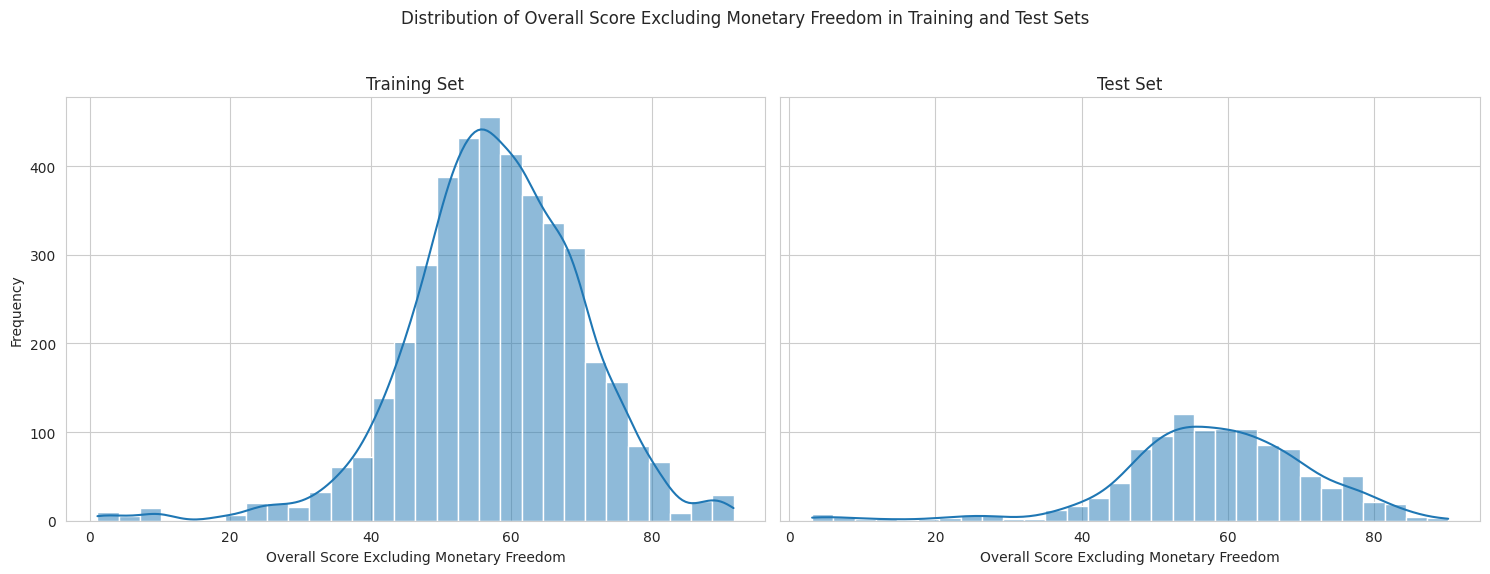


Descriptive Statistics for Overall Score Excluding Monetary Freedom (Training Set):


,overall_score_without_monetary_freedom
count,4133.000000
mean,57.798306
std,12.233667
min,1.111111
25%,50.755556
50%,57.850000
75%,65.877778
max,91.675000



Descriptive Statistics for Overall Score Excluding Monetary Freedom (Test Set):


,overall_score_without_monetary_freedom
count,1096.000000
mean,58.256933
std,13.098858
min,3.136364
25%,51.281818
50%,58.431818
75%,66.490909
max,90.127273


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of Overall Score Excluding Monetary Freedom in Training and Test Sets')

# Histogram for the training set
sns.histplot(train_df_efi['overall_score_without_monetary_freedom'].dropna(), kde=True, bins=30, ax=axes[0])
axes[0].set_title('Training Set')
axes[0].set_xlabel('Overall Score Excluding Monetary Freedom')
axes[0].set_ylabel('Frequency')

# Histogram for the test set
sns.histplot(test_df_efi['overall_score_without_monetary_freedom'].dropna(), kde=True, bins=30, ax=axes[1])
axes[1].set_title('Test Set')
axes[1].set_xlabel('Overall Score Excluding Monetary Freedom')
axes[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlapping
plt.show()

# Display descriptive statistics for both sets
print("\nDescriptive Statistics for Overall Score Excluding Monetary Freedom (Training Set):")
display(train_df_efi['overall_score_without_monetary_freedom'].describe())

print("\nDescriptive Statistics for Overall Score Excluding Monetary Freedom (Test Set):")
display(test_df_efi['overall_score_without_monetary_freedom'].describe())

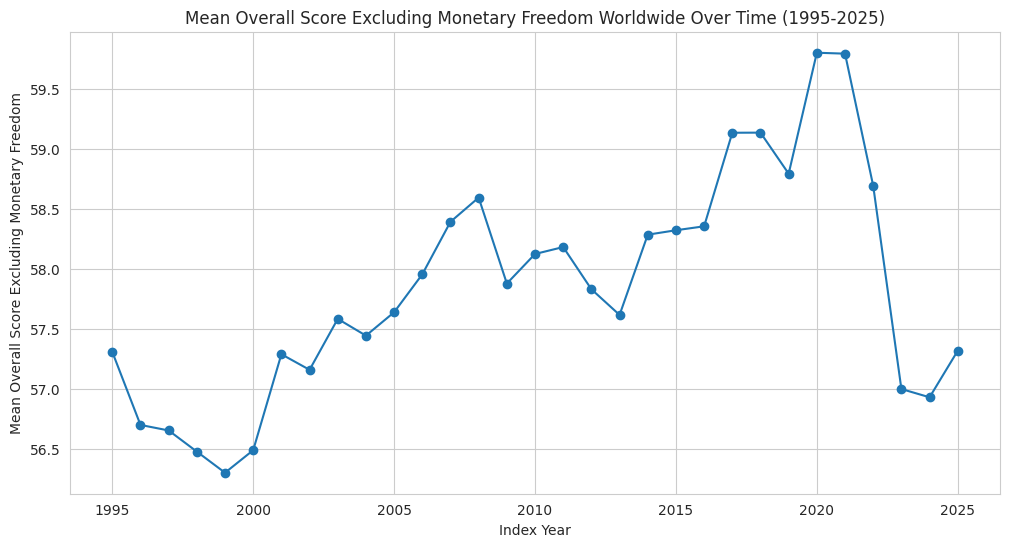

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean overall score excluding monetary freedom per year
mean_overall_score_by_year = df_efi.groupby('index_year')['overall_score_without_monetary_freedom'].mean()

# Plot the mean overall score excluding monetary freedom over time
plt.figure(figsize=(12, 6))
mean_overall_score_by_year.plot(marker='o', linestyle='-')
plt.title('Mean Overall Score Excluding Monetary Freedom Worldwide Over Time (1995-2025)')
plt.xlabel('Index Year')
plt.ylabel('Mean Overall Score Excluding Monetary Freedom')
plt.grid(True)
plt.show()

>The line chart shows the average economic freedom score worldwide from 1995 to 2025.
The x-axis represents the Index Year, and the y-axis shows the Mean Overall Score.
The line generally trends upwards, indicating an increase in average economic freedom over this period.
There are fluctuations year-to-year, with some periods of stagnation or slight decline.
A notable dip appears around 2020, likely reflecting the global event of the corona pandemic impacting economic freedom.

>Overall, the chart illustrates a long-term positive trend in average economic freedom, despite short-term variations.

### Interpretation of the Correlation Matrix Heatmap

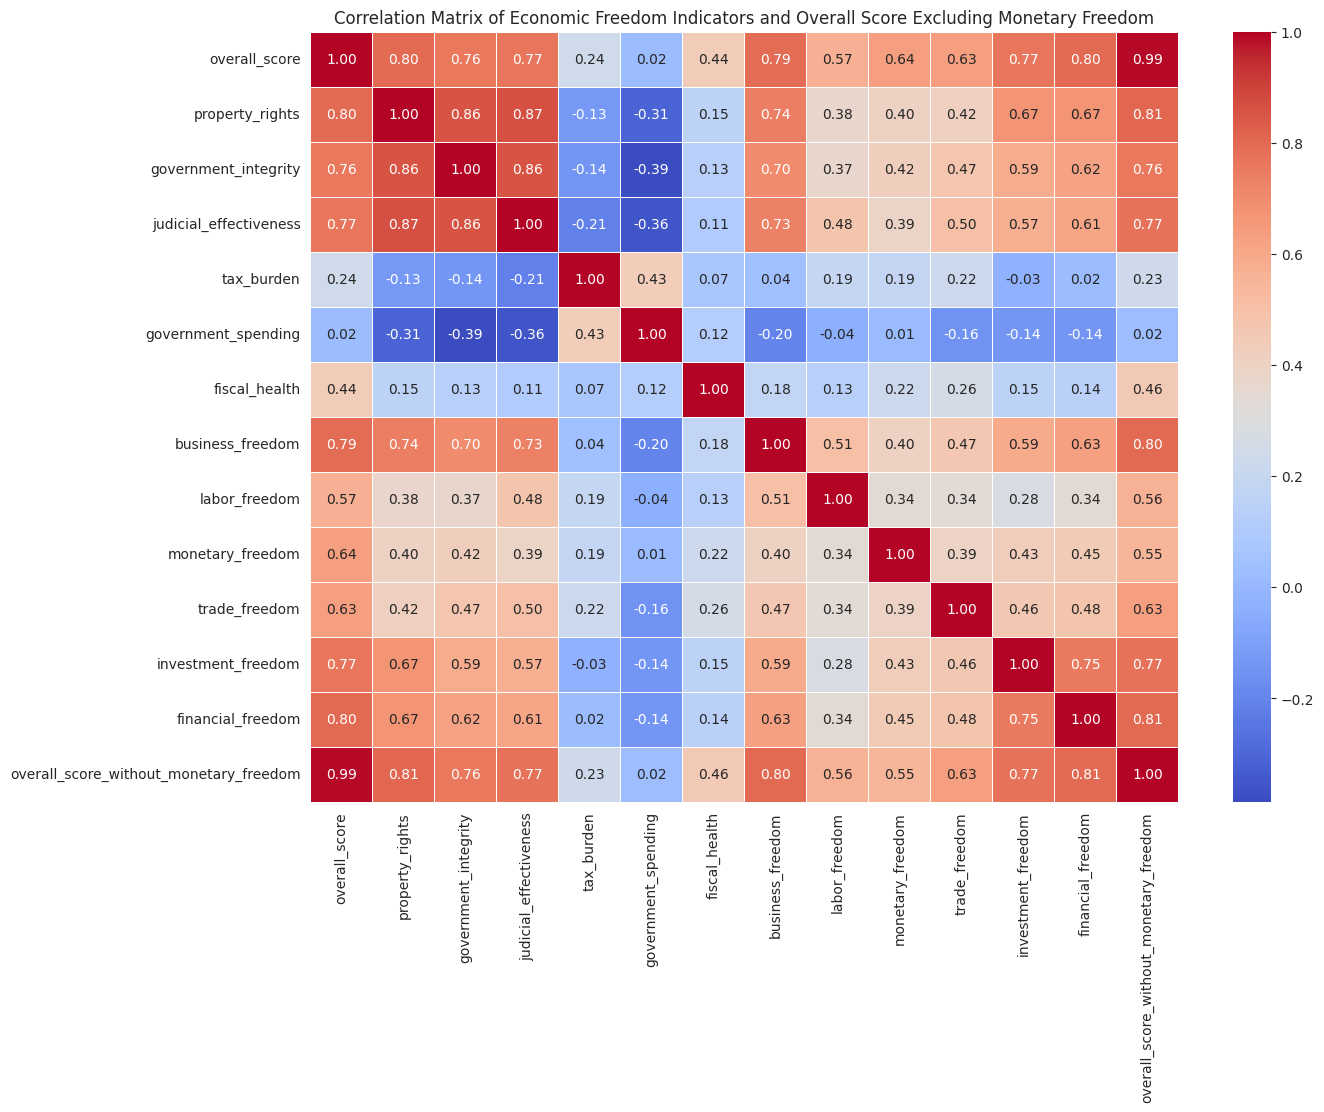

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis, including the new dependent variable
numerical_df = df_efi.select_dtypes(include=['float64', 'int64'])

# Exclude 'index_year' from the numerical dataframe
numerical_df = numerical_df.drop(columns=['index_year'])

# Calculate the correlation matrix
# .corr() method automatically handles missing values (pairwise deletion)
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Economic Freedom Indicators and Overall Score Excluding Monetary Freedom')
plt.show()



The heatmap displays the pairwise Pearson correlation coefficients between the 'overall_score' and the twelve individual economic freedom indicators, as well as the correlations among these indicators themselves.

**Interpretation of Correlations:**

1.  **Correlations with 'overall_score':**
    *   Looking at the first row (or column) of the matrix, which shows the correlations with 'overall_score'.
    *   You can see that most of the economic freedom indicators have a **strong positive correlation** with the 'overall_score'. Values close to +1 indicate a very strong positive linear relationship. For example, 'property_rights' (0.80), 'government_integrity' (0.76), 'judicial_effectiveness' (0.77), 'business_freedom' (0.79), 'investment_freedom' (0.77), and 'financial_freedom' (0.80) show very high positive correlations with 'overall_score'.
    *   This confirms that these indicators are strongly related to the overall score and are likely significant components of the index.
    *   Some indicators show more moderate positive correlations, such as 'labor_freedom' (0.57), 'monetary_freedom' (0.64), and 'trade_freedom' (0.63).
    *   'tax_burden' (0.24) and 'government_spending' (0.02) have lower positive correlations with 'overall_score'. 'fiscal_health' (0.44) has a moderate positive correlation.

2.  **Correlations among Independent Variables (Indicators with Each Other):**
    *   Looking at the submatrix of the indicators (everything except the first row/column).
    *   There are **many strong positive correlations** among the individual economic freedom indicators. For example, 'property_rights' correlates strongly with 'government_integrity' (0.86) and 'judicial_effectiveness' (0.87). 'government_integrity' also correlates strongly with 'judicial_effectiveness' (0.86).
    *   These high correlations between the independent variables are a clear indication of **multicollinearity**. This means that these indicators do not vary independently of each other but often change together.
    *   Some correlations are lower, suggesting that not all indicators are equally strongly related to each other.

**Conclusions from the Correlation Matrix:**

*   The correlation matrix confirms that the independent variables are strongly related to the 'overall_score', supporting our regression results that showed these variables explain 'overall_score' well.
*   The strong correlations *among* the independent variables confirm the presence of multicollinearity. This is important for interpreting individual regression coefficients. With high multicollinearity, it can be difficult to isolate the unique contribution of each variable to the model. This is particularly relevant if the goal is causal inference or understanding the independent impact of each variable. However, if the 'Overall Score' is a composite index calculated from these components, high multicollinearity among components is expected and more likely confirms that the correct components are included in the model.


### Basic Target Statistics

In [ ]:
# Basic target statistics for overall_score_without_monetary_freedom
print("Target Variable Analysis (Overall Score Excluding Monetary Freedom - Training Data):")
print(f"Mean: {y_train.mean():.2f}")
print(f"Median: {y_train.median():.2f}")
print(f"Standard Deviation: {y_train.std():.2f}")
print(f"Minimum: {y_train.min():.2f}")
print(f"Maximum: {y_train.max():.2f}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

Target Variable Analysis (Overall Score Excluding Monetary Freedom - Training Data):
Mean: 57.82
Median: 57.85
Standard Deviation: 12.08
Minimum: 1.11
Maximum: 91.67
Missing values: 0


>The output shows the mean, median, standard deviation, minimum, maximum, and count of missing values for the 'overall_score' in the training data.

*   Mean (59.44) and Median (59.50): These values are very close, suggesting the distribution of the target variable is fairly symmetrical around the center, with no strong skewness.
*   Standard Deviation (11.75): This indicates the typical spread of the 'overall_score' values around the mean. A standard deviation of 11.75 suggests a moderate level of variation in economic freedom scores within the training dataset.
*   Minimum (1.00) and Maximum (90.50): These show the full range of 'overall_score' values present in the training data.
*   Missing values (0): This confirms that there are no missing values in the 'overall_score' column of the training dataset after the imputation step.


>In summary, the target variable 'overall_score' in the training data is centered around the late 50s/early 60s, has a moderate spread, and covers a wide range of possible scores with no missing values.

count    4119.00
mean       57.82
std        12.08
min         1.11
25%        50.77
50%        57.85
75%        65.85
max        91.68
Name: overall_score_without_monetary_freedom, dtype: float64


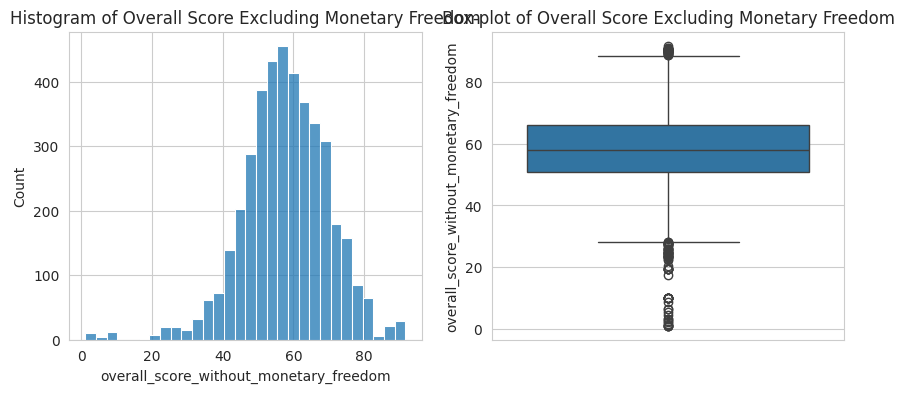

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(y_train, ax=ax[0], bins=30); ax[0].set_title("Histogram of Overall Score Excluding Monetary Freedom")
sns.boxplot(y_train, ax=ax[1]);            ax[1].set_title("Box-plot of Overall Score Excluding Monetary Freedom")
print(y_train.describe().round(2))

>The histogram confirms a roughly symmetrical, slightly left-skewed distribution, peaking around 60-65.
The box plot visually summarizes the distribution, showing the median (around 59.50) near the center of the box.

>The box represents the interquartile range (IQR), containing the middle 50% of the data, from about 52.80 to 67.30.
The whiskers extend to cover most of the data, and individual points beyond the whiskers represent potential outliers.
The minimum score is 1.00 and the maximum is 90.50.
The standard deviation is 11.75, indicating a moderate spread of scores.
Both plots and the statistics confirm the central tendency, spread, and range of the target variable.

Numeric stats:
                          mean    std  min    max
property_rights         47.99  23.80  0.0   98.4
government_integrity    40.71  22.42  0.0  100.0
judicial_effectiveness  46.54  20.07  5.0   93.8
tax_burden              72.87  15.65  0.0   99.9
government_spending     64.40  24.49  0.0   99.3
fiscal_health           66.23  30.49  0.0  100.0
business_freedom        64.14  16.00  0.0  100.0
labor_freedom           60.45  16.42  0.0  100.0
trade_freedom           69.05  16.06  0.0   95.0
investment_freedom      53.08  21.42  0.0   95.0
financial_freedom       49.56  20.09  0.0   90.0


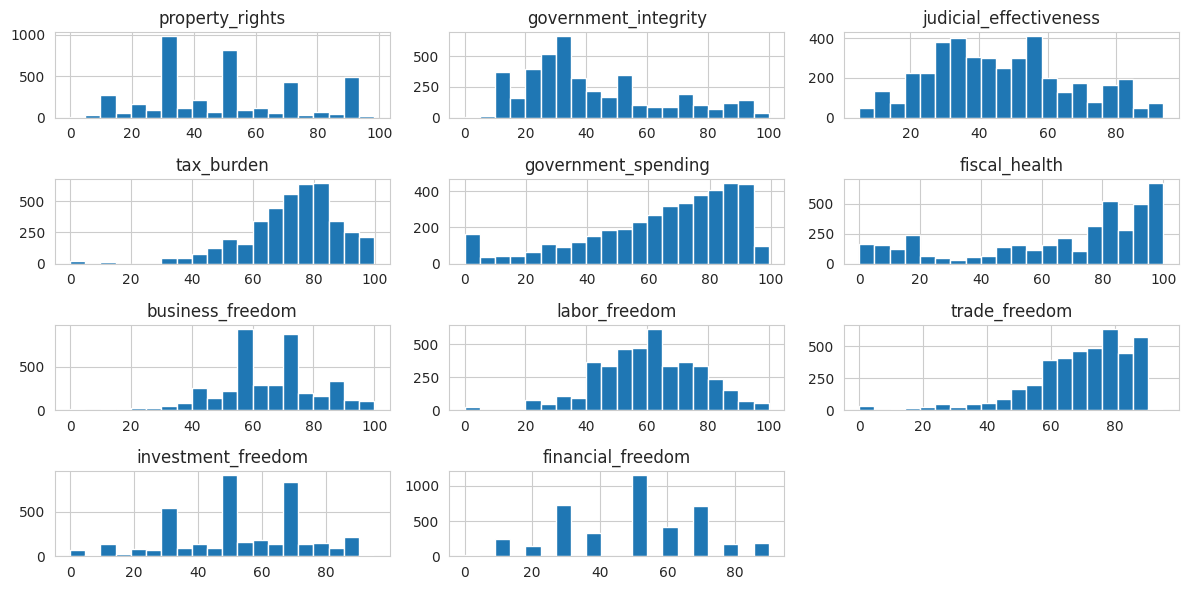

In [ ]:
num_cols = X_train.select_dtypes('number').columns
print("Numeric stats:\n", X_train[num_cols].describe().T[['mean','std','min','max']].round(2))
# Plot first 4 histograms
X_train[num_cols[:12]].hist(bins=20, figsize=(12,6))
plt.tight_layout()
plt.show()

>The grid of histograms shows the distribution of each individual numerical economic freedom indicator in the training data.
Each small chart displays the frequency of values for one specific indicator.

You can see variations in their shapes – some are somewhat symmetrical, while others are clearly skewed. For example, 'tax_burden' and 'government_spending' appear skewed towards higher values, while 'monetary_freedom' shows skewness towards lower values.

Some indicators have distributions clustered in certain ranges, indicating unusual concentrations of values. For instance, 'investment_freedom' and 'financial_freedom' show distinct peaks or gaps, suggesting that values for these indicators might be grouped at specific points rather than being smoothly distributed.

These histograms help in understanding the typical values, spread, and shape of the data for each individual feature. They are useful for identifying features that might need transformation (like power transformation or log transformation) to address skewness or that have unusual patterns in their value distribution.

Top correlations with Overall Score Excluding Monetary Freedom:
 financial_freedom       0.806
property_rights         0.802
business_freedom        0.791
investment_freedom      0.772
government_integrity    0.759
dtype: float64


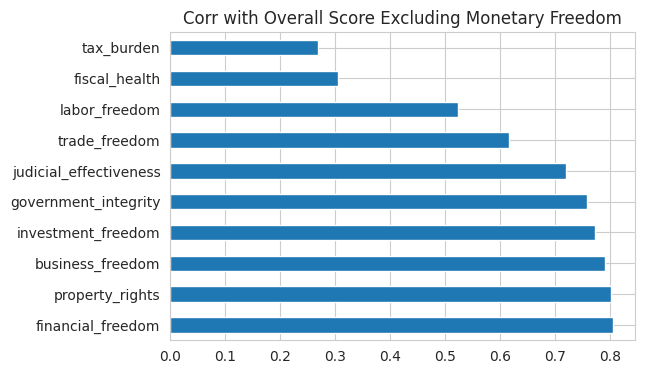

In [ ]:
corrs = X_train[num_cols].corrwith(y_train).sort_values(key=abs, ascending=False)
print("Top correlations with Overall Score Excluding Monetary Freedom:\n", corrs.head(5).round(3))
corrs.head(10).plot.barh(figsize=(6,4)); plt.title("Corr with Overall Score Excluding Monetary Freedom"); plt.show()

The horizontal bar chart displays the strength of the linear relationship (correlation) between each numerical feature and the target variable, 'overall_score'.

The length of each bar represents the correlation coefficient, and the features are ordered by the magnitude of their correlation.

Features with longer bars have a stronger correlation with the 'overall_score'.

All the displayed features have positive correlations with the 'overall_score', meaning as the value of these features increases, the overall score tends to increase as well.

Features like 'financial_freedom', 'property_rights', and 'business_freedom' have the strongest positive correlations, indicating they are most strongly associated with higher economic freedom scores.

Features like 'fiscal_health' and 'government_spending' have weaker positive correlations compared to the others.

> This chart helps to visually identify which features are most strongly related to the target variable, which can be useful for feature selection or understanding feature importance.

In [ ]:
def iqr_outliers(s):
    q1,q3=s.quantile([.25,.75]); iqr=q3-q1
    return s[(s<q1-1.5*iqr)|(s>q3+1.5*iqr)]
for col in num_cols[:12]:
    outs = iqr_outliers(X_train[col])
    print(f"{col}: {len(outs)} outliers ({len(outs)/len(X_train)*100:.1f}%)")

property_rights: 0 outliers (0.0%)
government_integrity: 114 outliers (2.8%)
judicial_effectiveness: 0 outliers (0.0%)
tax_burden: 104 outliers (2.5%)
government_spending: 133 outliers (3.2%)
fiscal_health: 0 outliers (0.0%)
business_freedom: 68 outliers (1.7%)
labor_freedom: 25 outliers (0.6%)
trade_freedom: 145 outliers (3.5%)
investment_freedom: 0 outliers (0.0%)
financial_freedom: 0 outliers (0.0%)


The output lists each numerical feature and reports the number and percentage of outliers found using the IQR method.

Features like 'government_integrity', 'tax_burden', 'government_spending', 'monetary_freedom', and 'trade_freedom' show some outliers (between 0.6% and 6.4%).

Other features, such as 'property_rights', 'judicial_effectiveness', 'fiscal_health', 'business_freedom', 'labor_freedom', 'investment_freedom', and 'financial_freedom', have no detected outliers based on this method.

The percentages indicate that for most features, the number of outliers is relatively small (below 5%).

>This analysis helps identify which features have extreme values that might warrant further investigation or specific handling during preprocessing.



In [ ]:
import numpy as np
corr_mat = X_train[num_cols].corr().abs()
high_corr = np.where((corr_mat>0.8)&(corr_mat<1.0))
pairs = [(num_cols[i],num_cols[j],corr_mat.iat[i,j])
         for i,j in zip(*high_corr) if i<j]
print("High-corr pairs:", pairs[:5])

High-corr pairs: [('property_rights', 'government_integrity', np.float64(0.8445045475190176))]


In [ ]:
print(" EDA SNAPSHOT (Predicting Overall Score Excluding Monetary Freedom)")
print(f"Target skew: {y_train.skew():.2f}")
print(f"Strongest predictor: {corrs.index[0]} {corrs.max():.3f}")
miss = (X_train.isnull().mean()*100).sort_values(ascending=False).head(3)
print("Top missing cols:\n", miss.round(1))
print("High-corr pairs:", pairs[:3])

 EDA SNAPSHOT (Predicting Overall Score Excluding Monetary Freedom)
Target skew: -0.49
Strongest predictor: financial_freedom 0.806
Top missing cols:
 property_rights           0.0
government_integrity      0.0
judicial_effectiveness    0.0
dtype: float64
High-corr pairs: [('property_rights', 'government_integrity', np.float64(0.8445045475190176))]


In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame with feature names, missing percentage, and skewness from X_train
fs = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Missing_Percentage': X_train.isnull().mean(),
    'Skewness': X_train.skew()
})

# Calculate 'Missing_Strategy' based on Missing_Percentage
fs['Missing_Strategy'] = fs['Missing_Percentage'].apply(
    lambda p: "None" if p == 0 else ("Median" if p < 0.05 else "Advanced")
)

# Calculate 'Transform' based on absolute Skewness
fs['Transform'] = fs['Skewness'].abs().apply(
    lambda s: "Log" if s > 2 else ("Scale" if s > 1 else "None")
)

# Select and reorder columns as needed for the final summary
fs = fs[['Feature Name', 'Missing_Percentage', 'Skewness', 'Missing_Strategy', 'Transform']]

print("Generated Feature Summary DataFrame:")
display(fs)

# Save the generated feature summary to a CSV file in the current directory
fs.to_csv("feature_summary.csv", index=False)
print("\n feature_summary.csv created in the current directory.")

Generated Feature Summary DataFrame:


,Feature Name,Missing_Percentage,Skewness,Missing_Strategy,Transform
property_rights,property_rights,0.0,0.349346,None,None
government_integrity,government_integrity,0.0,0.794060,None,None
judicial_effectiveness,judicial_effectiveness,0.0,0.321721,None,None
tax_burden,tax_burden,0.0,-1.128541,None,Scale
government_spending,government_spending,0.0,-0.955282,None,None
fiscal_health,fiscal_health,0.0,-0.851813,None,None
business_freedom,business_freedom,0.0,-0.278781,None,None
labor_freedom,labor_freedom,0.0,-0.313720,None,None
trade_freedom,trade_freedom,0.0,-1.414913,None,Scale
investment_freedom,investment_freedom,0.0,-0.351944,None,None



 feature_summary.csv created in the current directory.


he output you're seeing is a summary table (DataFrame) about your features, not a chart. Here's a short description and interpretation of this table:

The table provides a summary for each feature (column) in your training data.

It lists the 'Feature Name', the 'Missing_Percentage', and the 'Skewness'.

Based on these values, it suggests a 'Missing_Strategy' (how to handle missing values) and a 'Transform' (if a transformation might be needed due to skewness).

For example, features with 0.0 missing percentage have a 'None' missing strategy.

Features with high absolute skewness, like 'monetary_freedom', are suggested to potentially need a 'Log' transformation. Others with moderate skewness, like 'tax_burden' and 'trade_freedom', might need 'Scale'.

> This table is a helpful overview for understanding the data quality and distribution of your features and guiding further preprocessing steps.

